<a href="https://colab.research.google.com/github/JomarQr/Artificial-Intelligence-path/blob/main/H2_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Practice. Analyzing "Titanic" passengers

**Fill in the missing code ("You code here").

**<a href="https://www.kaggle.com/c/titanic">Competition</a> Kaggle "Titanic: Machine Learning from Disaster".**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
import matplotlib.pyplot as plt

**Read data**

**0. Read the data.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')

In [ ]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
train_df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Let's drop`Cabin`, and then – all rows with missing values.**

In [ ]:
train_df = train_df.drop("Cabin", axis=1).dropna()

In [ ]:
train_df.shape

(712, 11)

**1. Build a picture to visualize all scatter plots for each pair of features `Age`, `Fare`, `SibSp`, `Parch` and `Survived`. ( `scatter_matrix ` from Pandas or `pairplot` from Seaborn)**

In [ ]:
selected_features = ["Age", "Fare", "SibSp", "Parch", "Survived"]

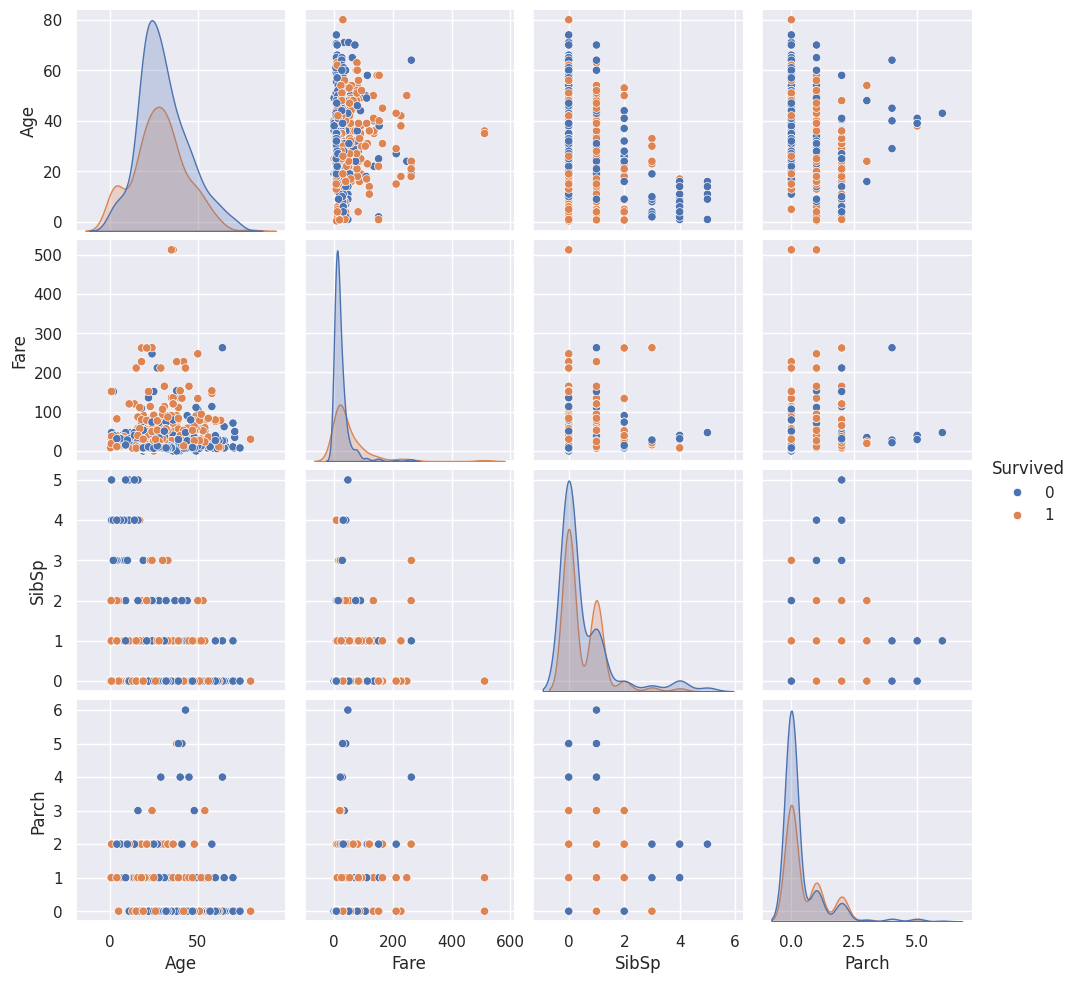

In [ ]:
sns.pairplot(train_df[selected_features], hue="Survived", diag_kind="kde")
plt.show()

**2. How does ticket price (`Fare`) depend on `Pclass`? Build a boxplot.**

In [ ]:
plt.figure(figsize=(8, 5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

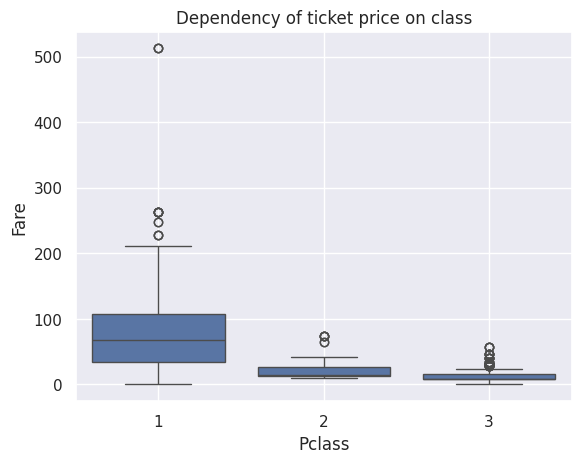

In [ ]:
sns.boxplot(x="Pclass", y="Fare", data=train_df)

plt.xlabel("Pclass")
plt.ylabel("Fare")
plt.title("Dependency of ticket price on class")
plt.grid(True)

plt.show()

**3. Let's build the same plot but restricting values of `Fare` to be less than 95% quantile of the initial vector (to drop outliers that make the plot less clear).**

In [ ]:
fare_95 = train_df["Fare"].quantile(0.95)

In [ ]:
filtered_df = train_df[train_df["Fare"] <= fare_95]


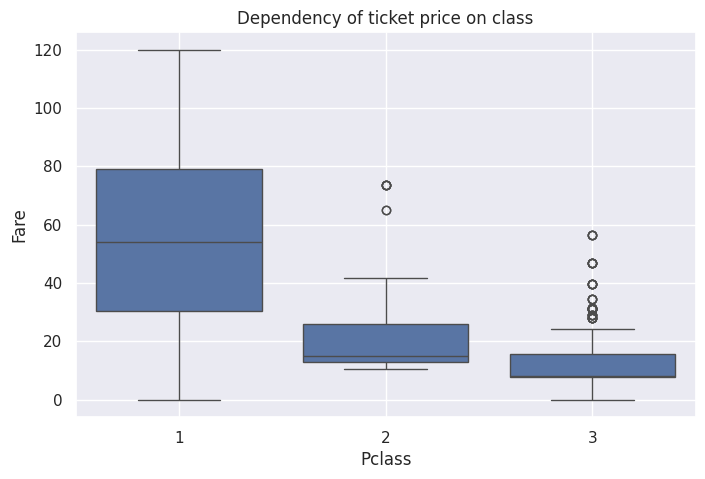

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Pclass", y="Fare", data=filtered_df)

plt.xlabel("Pclass")
plt.ylabel("Fare")
plt.title("Dependency of ticket price on class")
plt.grid(True)

plt.show()

**4. How is the percentage of surviving passengers dependent on passengers' gender? Depict it with `Seaborn.countplot` using the `hue` argument.**

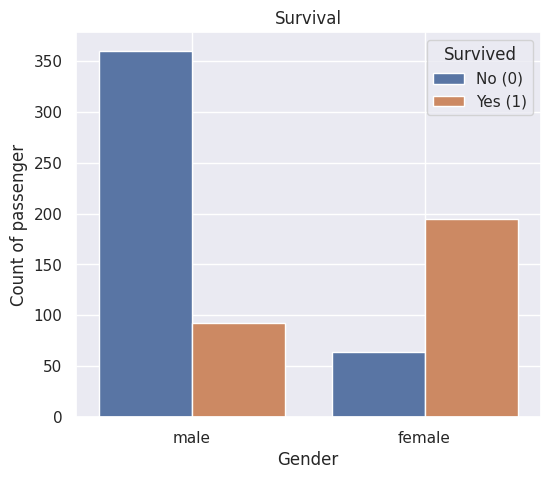

In [ ]:
plt.figure(figsize=(6, 5))
sns.countplot(x="Sex", hue="Survived", data=train_df)

plt.xlabel("Gender")
plt.ylabel("Count of passenger")
plt.title("Survival")
plt.legend(title="Survived", labels=["No (0)", "Yes (1)"])
plt.grid(True)

plt.show()


**5. How does the distribution of ticket prices differ for those who survived and those who didn't. Depict it with `Seaborn.boxplot`**

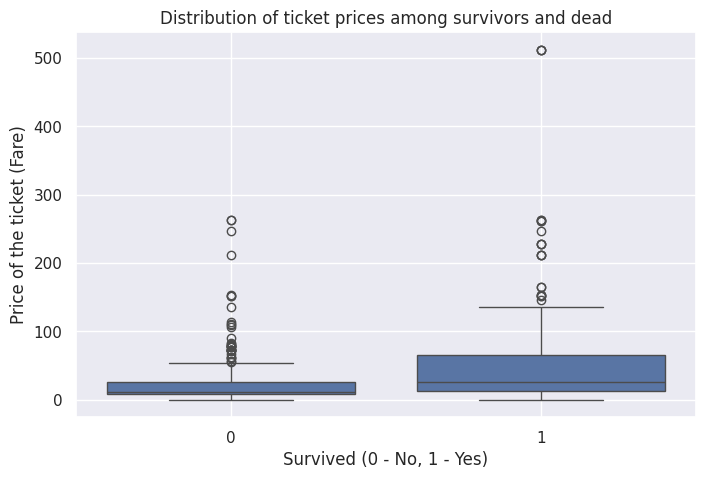

In [ ]:
plt.figure(figsize=(8, 5))

sns.boxplot(x="Survived", y="Fare", data=train_df)

plt.xlabel("Survived (0 - No, 1 - Yes)")
plt.ylabel("Price of the ticket (Fare)")
plt.title("Distribution of ticket prices among survivors and dead")
plt.grid(True)

plt.show()

**6. How does survival depend on passengers' age?  Verify (graphically) an assumption that youngsters (< 30 y.o.) survived more frequently than old people (> 55 y.o.).**

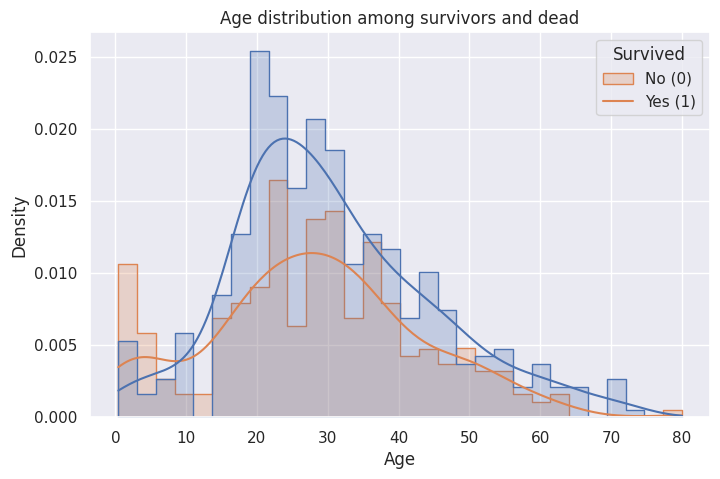

In [ ]:
plt.figure(figsize=(8, 5))

sns.histplot(data=train_df, x="Age", hue="Survived", bins=30, kde=True, element="step", stat="density")

plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age distribution among survivors and dead")
plt.legend(title="Survived", labels=["No (0)", "Yes (1)"])
plt.grid(True)

plt.show()


<ipython-input-36-3815c6ee8246>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="AgeGroup", y="Survived", data=train_df, ci=None)


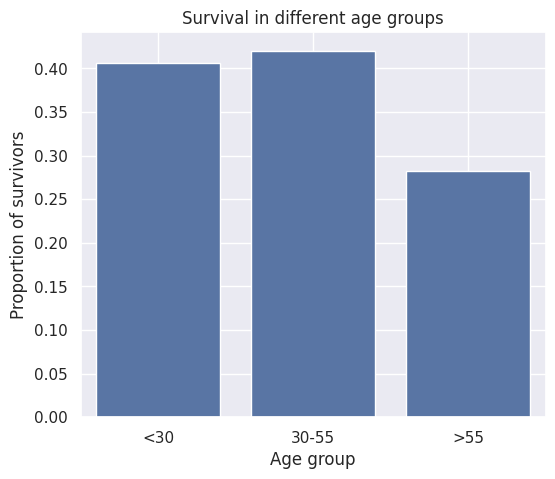

In [ ]:
train_df["AgeGroup"] = pd.cut(train_df["Age"], bins=[0, 30, 55, 100], labels=["<30", "30-55", ">55"])

plt.figure(figsize=(6, 5))

sns.barplot(x="AgeGroup", y="Survived", data=train_df, ci=None)

plt.xlabel("Age group")
plt.ylabel("Proportion of survivors")
plt.title("Survival in different age groups")
plt.grid(True)

plt.show()
